<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/custom/guideline_adherence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Guideline Adherence</h1>

**What is Guideline Adherence?**: Guideline adherence refers to the extent to which the LLM follows a given guideline, rule, or protocol. Given the complexity of LLMs, it is crucial to define certain guidelines, be it in terms of the structure of the output or the constraints on the content of the output or protocols on the decision-making capabilities of the LLM (agents). 

For example, for an LLM-powered chatbot agent trained to perform appointment booking tasks only, you want to make sure that the LLM is following the guideline: "The agent should redirect all the queries to the human agent, except the ones related to appointment booking."


| Column Name | Description |
| ----------- | ----------- |
| question | The question asked by the user |
| response | The response given by the model |
| guideline | Explanation of the guideline to be followed |
| guideline_name | Naming the guideline for better accessibility |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
data = [{
    'question': 'How tall is the Burj Khalifa?',
    'response': 'Burj Khalifa in Dubai is the tallest building in the world. It stands at a height of 828 meters (2,717 feet).'
},
{
    'question': 'How to install UpTrain?',
    'response': 'You can install UpTrain by running - pip install uptrain.'
}]

In [3]:
guideline = "Response shouldn't contain any specifc numbers or pricing-related information."

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [4]:
from uptrain import EvalLLM, Evals, GuidelineAdherence
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [GuidelineAdherence(guideline=guideline, guideline_name="No Numbers")]
)

2024-01-31 18:07:22.016 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


## Step 4: Let's look at some of the results 

In [5]:
print(json.dumps(res,indent=3))

[
   {
      "question": "How tall is the Burj Khalifa?",
      "response": "Burj Khalifa in Dubai is the tallest building in the world. It stands at a height of 828 meters (2,717 feet).",
      "score_No Numbers_adherence": 0.0,
      "explanation_No Numbers_adherence": " \"The given LLM response strictly violates the given guideline because it contains specific numerical information about the height of Burj Khalifa in Dubai. The response states that the building stands at a height of 828 meters (2,717 feet), which directly contradicts the guideline's instruction to avoid including specific numbers. Therefore, the response fails to adhere to the guideline by including pricing-related information.\""
   },
   {
      "question": "How to install UpTrain?",
      "response": "You can install UpTrain by running - pip install uptrain.",
      "score_No Numbers_adherence": 1.0,
      "explanation_No Numbers_adherence": " \"The given LLM response strictly adheres to the given guideline becau

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [6]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-guideline-aderence",
    data = data,
    checks = [GuidelineAdherence(guideline=guideline, guideline_name="No Numbers")]
)

2024-01-31 18:07:44.099 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [7]:
print(json.dumps(res,indent=3))

[
   {
      "question": "How tall is the Burj Khalifa?",
      "response": "Burj Khalifa in Dubai is the tallest building in the world. It stands at a height of 828 meters (2,717 feet).",
      "score_No Numbers_adherence": 0.0,
      "explanation_No Numbers_adherence": " \"The given LLM response strictly violates the given guideline because it contains specific numerical information about the height of Burj Khalifa in Dubai. The response states that the building stands at a height of 828 meters (2,717 feet), which directly contradicts the guideline that response shouldn't contain any specific numbers or pricing-related information. Therefore, the response fails to adhere to the guideline by including specific numerical details.\"\n"
   },
   {
      "question": "How to install UpTrain?",
      "response": "You can install UpTrain by running - pip install uptrain.",
      "score_No Numbers_adherence": 1.0,
      "explanation_No Numbers_adherence": " \"The given LLM response strictly a

### Dashboards: 
Histogram of score vs number of cases with that score

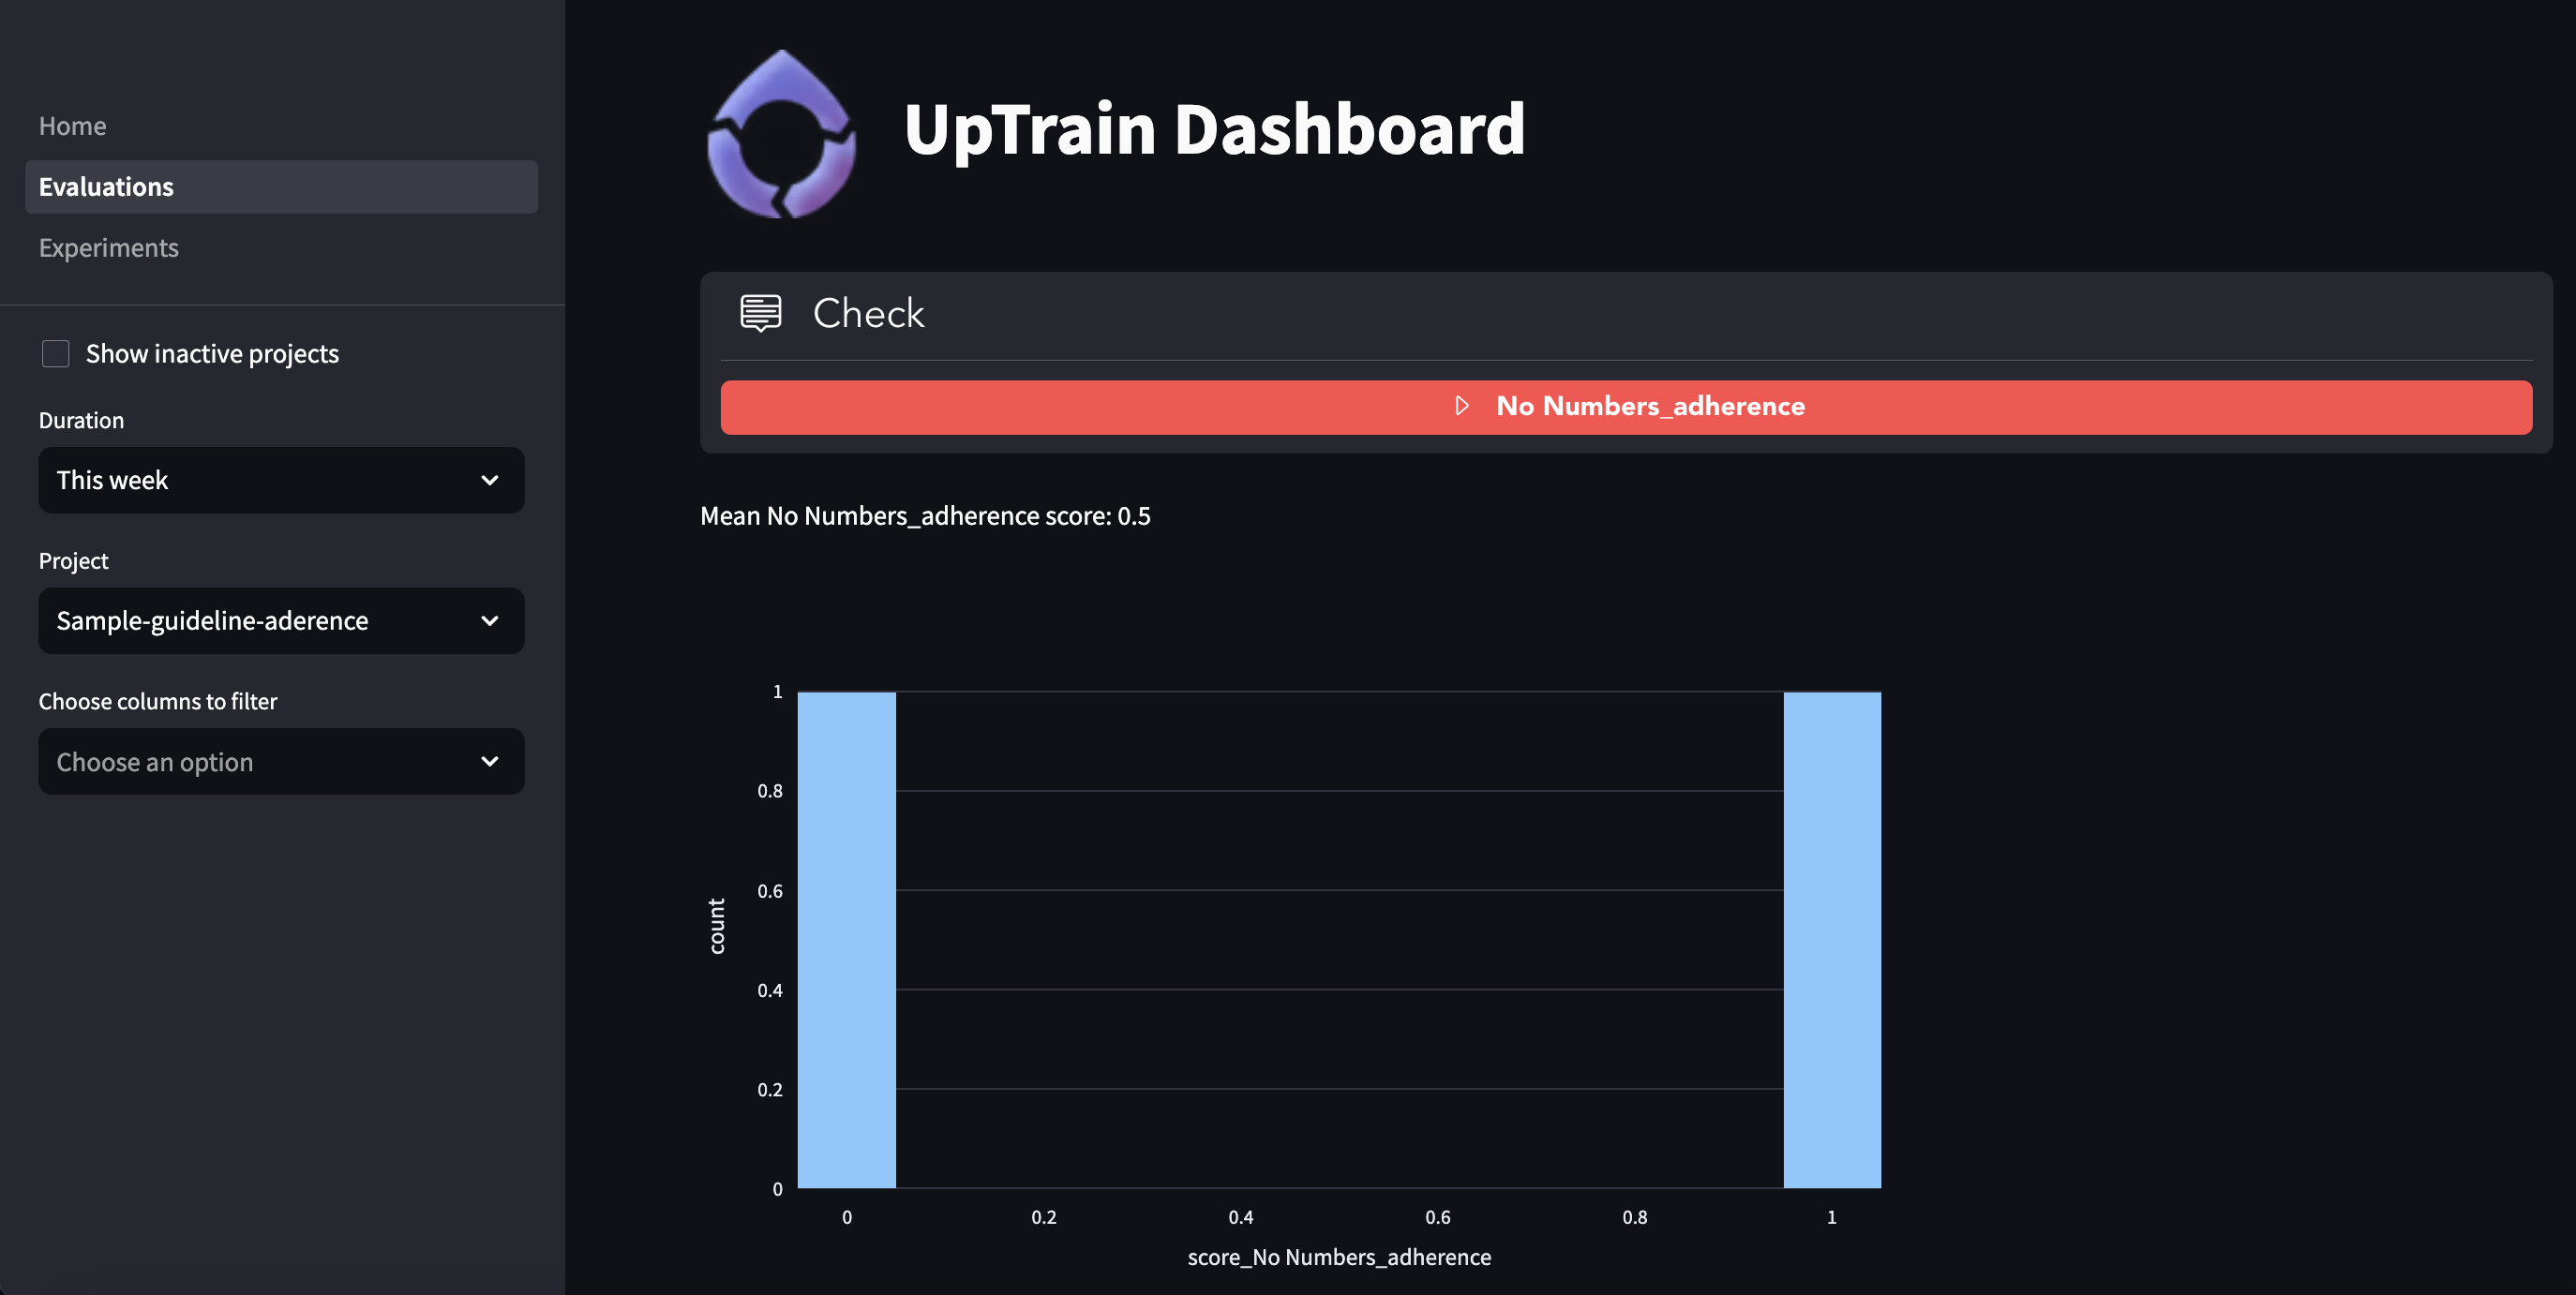

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

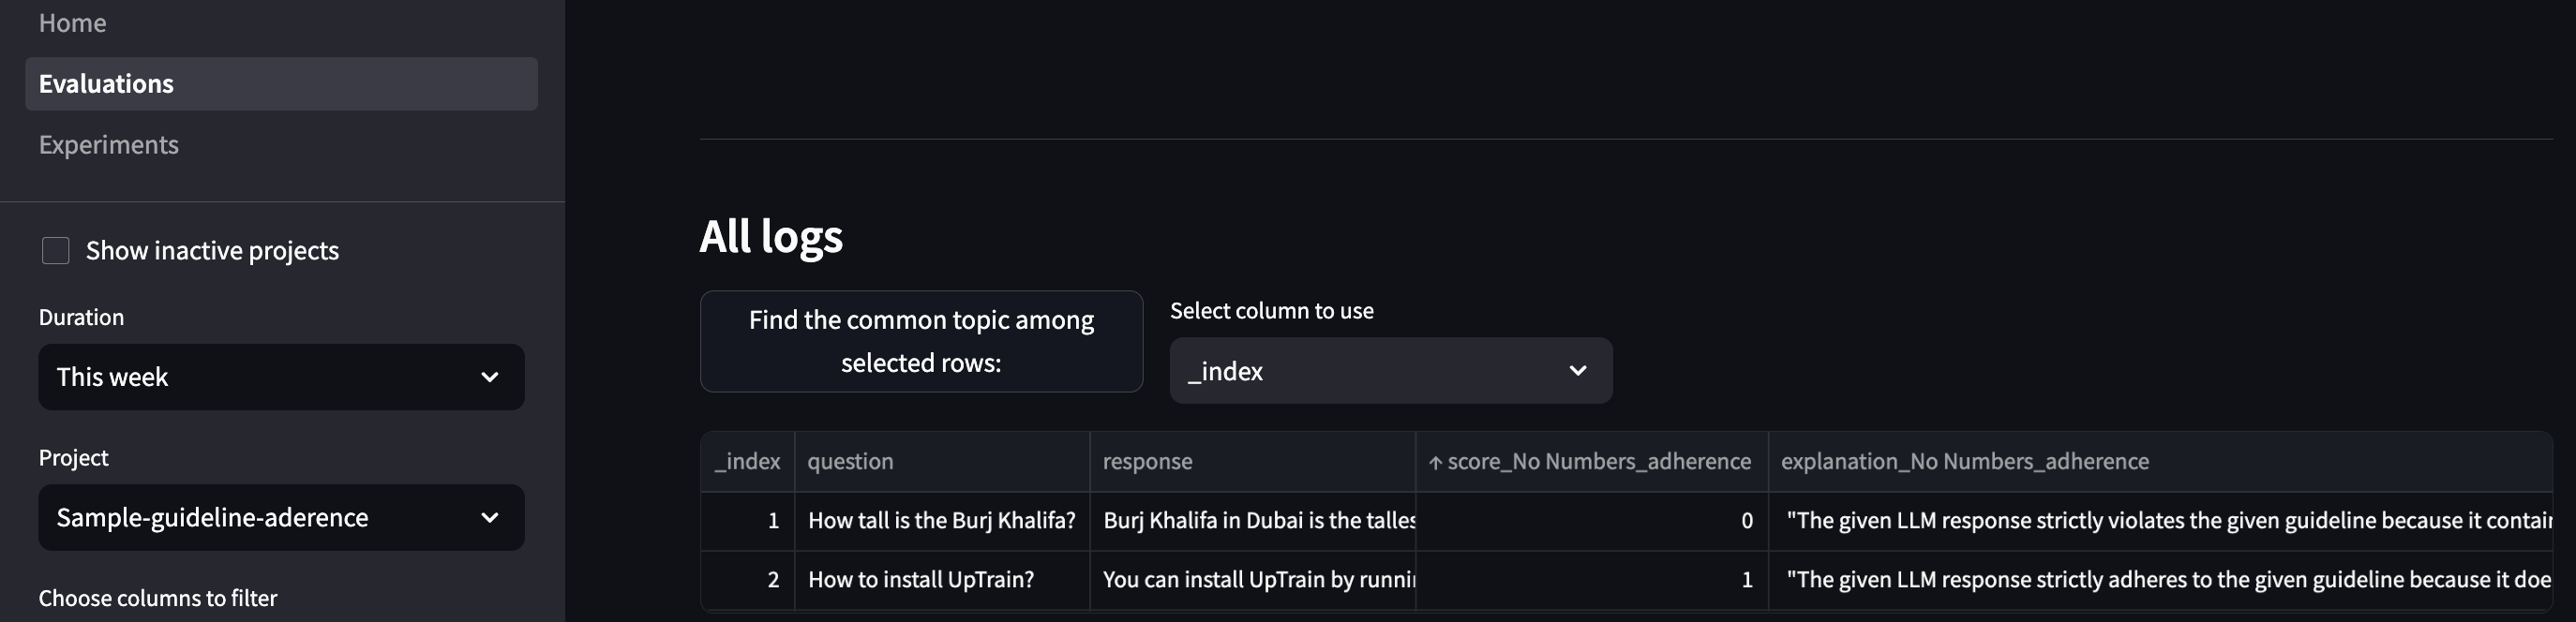